#  Решающие деревья

Набор данных ORGANICS содержит 13 переменных и более 22000 наблюдений.

Описание: В супермаркете действует программа лояльности клиентов. В качестве плана для первоначального стимулирования покупок всем участникам программы лояльности были предложены купоны на покупку органических продуктов. Затем были собраны данные о том, купили ли эти клиенты какой-либо из органических продуктов.

Цель: Исследовать модель для предсказания влияний купонов на покупку товара.

Информация о данных: 
- ID - идентификатор клиента-участника программы лояльности 
- DemAffl - уровень доходов от 1 до 30 
- DemAge - возраст 
- DemCluster - тип района, в котором проживает клиент 
- DemClusterGroup - область проживания
- DemGender - M = мужской, F = женский, U = неизвестный 
-  DemReg - географический район 
- DemTVReg - регион телевещания 
- PromClass - Статус программы лояльности: tin - оловянный, silver - серебряный, gold - золотой, platinum - плтинум
 - PromSpend - общая потраченная сумма 
- PromTime - срок участия в программе лояльности 

- TargetBuy - приобретен ли продукт: 0 == Нет, 1 == Да 
- TargetAmt - количество приобритенных продуктов

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
#для Colab

#%%capture
 #!wget https://drive.google.com/drive/folders/1Cky7JaiNEH3gjX2ZOtMudpJdDVSkPaqF

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%matplotlib inline
df=pd.read_csv('/content/drive/MyDrive/4 semestre/Введение в искусственный интеллек/HW/Part 2_Базовые алгоритмы ML/Деревья решений и лес/ORGANICS3.csv')


In [ ]:
df.head(4)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1


In [ ]:
print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [ ]:
df['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
df


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,No,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,No,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,No,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,No,0


In [ ]:
df.head(4)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1


In [ ]:
df1= df.drop(df.columns[[0,12]], axis=1)

In [ ]:
df1.head(4)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy


In [ ]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          22223 non-null  float64
 1   DemAge           22223 non-null  float64
 2   DemCluster       22223 non-null  float64
 3   DemClusterGroup  22223 non-null  object 
 4   DemGender        22223 non-null  object 
 5   DemReg           22223 non-null  object 
 6   DemTVReg         22223 non-null  object 
 7   PromClass        22223 non-null  object 
 8   PromSpend        22223 non-null  float64
 9   PromTime         22223 non-null  float64
 10  TargetBuy        22223 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df4['DemClusterGroup'] = le.fit_transform(df4['DemClusterGroup'])
df4['DemGender'] = le.fit_transform(df4['DemGender'])
df4['DemReg'] = le.fit_transform(df4['DemTVReg'])
df4['DemTVReg'] = le.fit_transform(df4['DemTVReg'])
df4['PromClass'] = le.fit_transform(df4['PromClass'])
df4['TargetBuy'] = le.fit_transform(df4['TargetBuy'])
#display the initial records
df4.head(20)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1
5,9.0,72.0,28.0,3,2,7,7,1,20759.81,3.0,1
6,11.0,74.0,3.0,0,0,2,2,3,0.01,8.0,1
7,13.0,62.0,32.0,3,1,5,5,3,0.01,5.0,1
8,10.0,62.0,49.0,5,1,2,2,2,2038.76,3.0,1
9,14.0,43.0,49.0,5,0,3,3,0,6000.00,1.0,0


In [ ]:
x=df4.values[:, 0:10]
y=df4.values[::,10]
print(x)
print(y)



[[1.0e+01 7.6e+01 1.6e+01 ... 0.0e+00 1.6e+04 4.0e+00]
 [4.0e+00 4.9e+01 3.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [5.0e+00 7.0e+01 2.7e+01 ... 2.0e+00 2.0e-02 8.0e+00]
 ...
 [9.0e+00 7.0e+01 1.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [1.1e+01 6.6e+01 8.0e+00 ... 2.0e+00 5.0e+03 5.0e+00]
 [3.0e+00 7.5e+01 5.3e+01 ... 0.0e+00 6.0e+03 2.0e+00]]
[1. 1. 0. ... 1. 1. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 13)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
df_majority = df4[y==0]
df_minority = df4[y==1]
df_majority.head(10)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
9,14.0,43.0,49.0,5,0,3,3,0,6000.00,1.0,0
11,5.0,51.0,24.0,2,1,3,3,2,5000.00,1.0,0
14,16.0,37.0,18.0,2,0,3,3,3,0.01,4.0,0
17,8.0,42.0,19.0,2,0,2,2,3,0.01,5.0,0
18,7.0,51.0,40.0,4,0,1,1,3,0.01,5.0,0
27,8.0,72.0,52.0,2,0,10,10,2,1250.00,23.0,0
28,7.0,43.0,53.0,5,1,7,7,3,0.01,5.0,0
30,8.0,37.0,5.0,1,1,9,9,2,1000.00,9.0,0


In [ ]:
#Далее мы создадим новый DataFrame с улучшенным классом меньшинства. Вот шаги:

#Сначала мы разделим наблюдения от каждого класса на разные фреймы данных.
#Далее мы повторно сэмплируем класс меньшинства с заменой , установив количество выборок, соответствующее классу большинства.
#Наконец, мы объединим класс меньшинства с повышенной дискретизацией DataFrame с исходным классом большинства DataFrame.


from sklearn.utils import resample
# Separate majority and minority classes
target = df4['TargetBuy']
df_majority = df4[target==1]
df_minority = df4[target==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=16718,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
# Display new class counts
df_upsampled.TargetBuy.value_counts()
# новый DataFrame имеет больше наблюдений, чем оригинал, и соотношение двух классов теперь составляет 1: 1.

1    16718
0    16718
Name: TargetBuy, dtype: int64

In [ ]:
df_upsampled.head(4)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1
5,9.0,72.0,28.0,3,2,7,7,1,20759.81,3.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 10)
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [ ]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [ ]:
# метрики качества прогнозов на основе матрицы ошибок (TP + TN) / float(TP + TN + FP + FN))
#Точность классификации: В целом, как часто верен классификатор?
from sklearn.metrics import accuracy_score
y_pred = tree_entropy.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.808009599520024


In [ ]:
tree_entropy.score(X_train, y_train)# результат на обучающей выборке


0.8094625867832348

In [ ]:
tree_entropy.score(X_test,y_test)

0.808009599520024

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = tree_entropy.predict(X_test)
# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6636041627266623

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
  
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)


Confusion matrix, without normalization
[[ 616  973]
 [ 307 4771]]


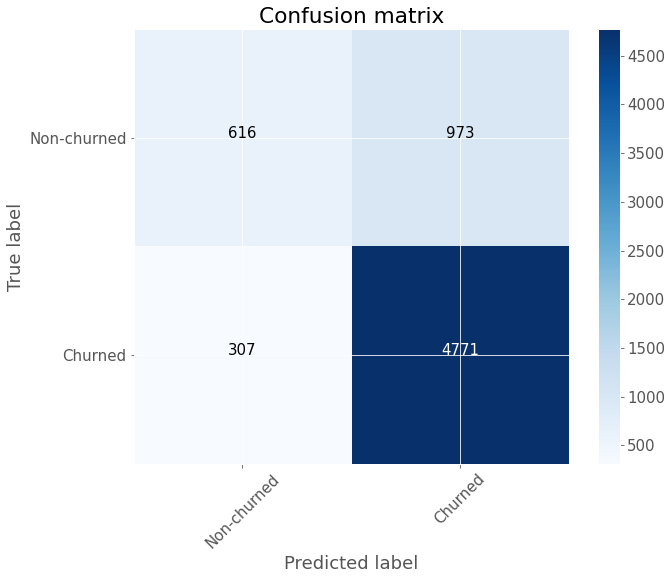

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, tree_entropy.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
# Predict on training set
pred_y_0 = tree_entropy.predict(X_test)

In [ ]:
#Проверка предсказанных классов
print( np.unique( pred_y_0 ) )

[0. 1.]


In [ ]:
#tree_entropy.predict([[4.0,49.0,35.0, 6000.00,5.0]]) # прогноз
#число неправильно классифицированных объектов
y_pred = tree_entropy.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1280


In [ ]:
# метрики качества прогнозов на основе матрицы ошибок (TP + TN) / float(TP + TN + FP + FN))
#Точность классификации: В целом, как часто верен классификатор?
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))



0.808009599520024


0.6722114869582654

In [ ]:

from sklearn.ensemble  import  RandomForestClassifier 
# Создаём модель леса из сотни деревьев
clf = RandomForestClassifier(n_estimators=100,  max_features = 'sqrt',max_depth=6, min_samples_split=2, random_state=42)
# Обучаем на тренировочных данных
clf.fit(X_train, y_train)
# Действующая классификация
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred)) 

0.8105594720263987
[[ 551 1038]
 [ 225 4853]]


In [ ]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6512250924594576

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn import metrics

In [ ]:
clf.score(X_train, y_train)# результат на обучающей выборке,переобученная

0.8126767806634096

In [ ]:
clf.score(X_test,y_test)

0.8105594720263987

<BarContainer object of 10 artists>

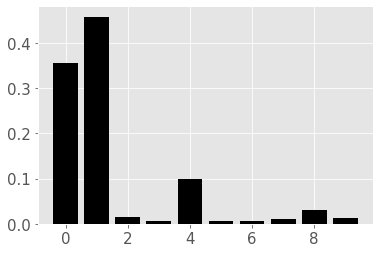

In [ ]:

plt.bar(np.arange(len(clf.feature_importances_)), clf.feature_importances_,
color='black')


In [ ]:
from sklearn.ensemble import BaggingClassifier
#bagging
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

bag_model=BaggingClassifier(base_estimator=tree_entropy, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
y_pred_bag=bag_model.predict(X_test)
print(bag_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_bag)) 


0.8071096445177741
[[ 659  930]
 [ 356 4722]]


In [ ]:
# Рассчитываем roc auc

roc_value = roc_auc_score(y_test, y_pred_bag)
roc_value

0.6723099509204553

# Задание (6 баллов)

Улучшить качество модели по выборке  Organics, изменяя  параметры деревьев, можно создать новые признаки и др. варианты

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 597,  762],
       [ 799, 3398]])